In [19]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import json
import matplotlib.pyplot as plt
from pathlib import Path

load_dotenv()

True

In [20]:
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [21]:
current_date = pd.Timestamp("2021-01-19", tz="America/New_York").isoformat()
tickers = ["MSFT", "UPS", "WMT", "FDX", "ECL", "CCI", "CAT", "WM", "AAPL", "CNI"]
timeframe = "1D"

df_ticker = alpaca.get_barset(tickers, timeframe,start=current_date).df

close_prices_df = pd.DataFrame()

for ticker in tickers:
        close_prices_df[ticker] = df_ticker[ticker]['close']

close_prices_df

,MSFT,UPS,WMT,FDX,ECL,CCI,CAT,WM,AAPL,CNI
time,,,,,,,,,,
2021-01-19 00:00:00-05:00,216.4400,156.27,143.39,249.52,215.91,159.39,194.04,115.070,127.8200,109.69
2021-01-20 00:00:00-05:00,224.1800,159.82,145.46,251.96,218.37,159.05,192.38,115.050,131.9700,110.13
2021-01-21 00:00:00-05:00,224.9000,160.16,144.87,253.91,214.02,159.37,192.25,114.570,136.8700,108.27
2021-01-22 00:00:00-05:00,225.8400,158.99,146.30,254.09,212.41,158.91,191.93,115.430,138.9699,106.63
2021-01-25 00:00:00-05:00,229.5200,161.75,146.24,253.48,211.27,160.89,187.39,114.220,142.9000,107.99
...,...,...,...,...,...,...,...,...,...,...
2021-05-03 00:00:00-04:00,251.8801,212.20,142.13,304.62,226.96,187.81,228.17,140.310,132.5563,109.10
2021-05-04 00:00:00-04:00,247.9300,214.27,140.74,304.50,229.16,183.93,233.48,140.900,127.9300,108.71
2021-05-05 00:00:00-04:00,246.5100,214.55,140.62,306.54,227.94,183.27,237.92,141.645,128.1600,109.92


In [22]:
daily_returns = close_prices_df.pct_change().dropna()

correlation = daily_returns.corr()

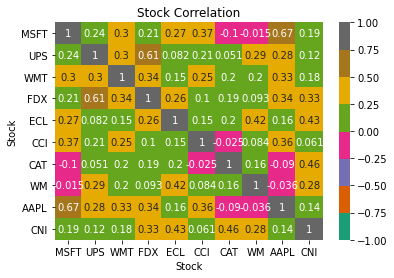

In [23]:
import seaborn as sns

def correlation_map(dataframe):
    stock_corr_plot = sns.heatmap(dataframe, vmin = -1, vmax = 1, cmap = "Dark2", annot= True)
    stock_corr_plot.set(
    xlabel = "Stock", 
    ylabel = "Stock",
    title = "Stock Correlation")

correlation_map(correlation)

In [24]:
portfolio_mean = daily_returns.mean()

portfolio_returns = daily_returns.sum()

In [25]:
#Portfolio Base will always be evenly distributed

portfolio_weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

In [26]:
#The Base Portfolio will give the total portfolio change per day

daily_returns["Base Portfolio"] = daily_returns.dot(portfolio_weights)

In [27]:
portfolio_total_return = daily_returns["Base Portfolio"].sum()

In [28]:
Portfolio_1 = daily_returns["Base Portfolio"]
Portfolio_1 = pd.DataFrame(Portfolio_1)

## Beginning New Portfolio

In [29]:
#Dropping the column of first portfolio
daily_returns.drop(daily_returns.columns[[-1]], axis=1, inplace=True)

In [30]:
portfolio2_weights = [.4, .05, .073, .036, .039, .047, .076, .095, .101, .083]
sum(portfolio2_weights)

1.0

In [31]:
daily_returns["Portfolio 2"] = daily_returns.dot(portfolio2_weights)

In [32]:
Portfolio_2 = daily_returns["Portfolio 2"]
Portfolio_2 = pd.DataFrame(Portfolio_2)

In [33]:
p1_and_p2 = pd.concat([Portfolio_1,Portfolio_2],axis=1)
p1_and_p2

,Base Portfolio,Portfolio 2
time,,
2021-01-20 00:00:00-05:00,0.011970,0.020135
2021-01-21 00:00:00-05:00,0.000651,0.002592
2021-01-22 00:00:00-05:00,0.000308,0.002503
2021-01-25 00:00:00-05:00,0.004483,0.008767
2021-01-26 00:00:00-05:00,0.000292,0.004995
...,...,...
2021-05-03 00:00:00-04:00,0.014668,0.007943
2021-05-04 00:00:00-04:00,-0.003807,-0.008760
2021-05-05 00:00:00-04:00,0.002975,0.000630


In [34]:
total_returns = p1_and_p2.sum()
print(total_returns)

Base Portfolio    0.144735
Portfolio 2       0.142199
dtype: float64


In [35]:
import plotly.express as px

In [36]:
bar_returns = px.bar(total_returns, range_y= (-.01,.3),title="Portfoli0 Returns", labels={"value":"Return Percentage", "index":"Portfolio"}, width=(500), height=(600))
bar_returns